In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [ ]:
# Plan1 - Base de dados
# Plan2 - Novas entradas
Base_Dados = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

In [ ]:
# 1 - Não usou
# 2 - Serviço
# 3 - Furto

Base_Dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [ ]:
Base_Dados.tail()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
495,496,24,389,19026,1
496,497,47,967,19022,1
497,498,58,1520,19019,2
498,499,72,3155,19029,3
499,500,54,3656,19034,3


In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [ ]:
Base_Dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


In [ ]:
Base_Dados.shape

(500, 5)

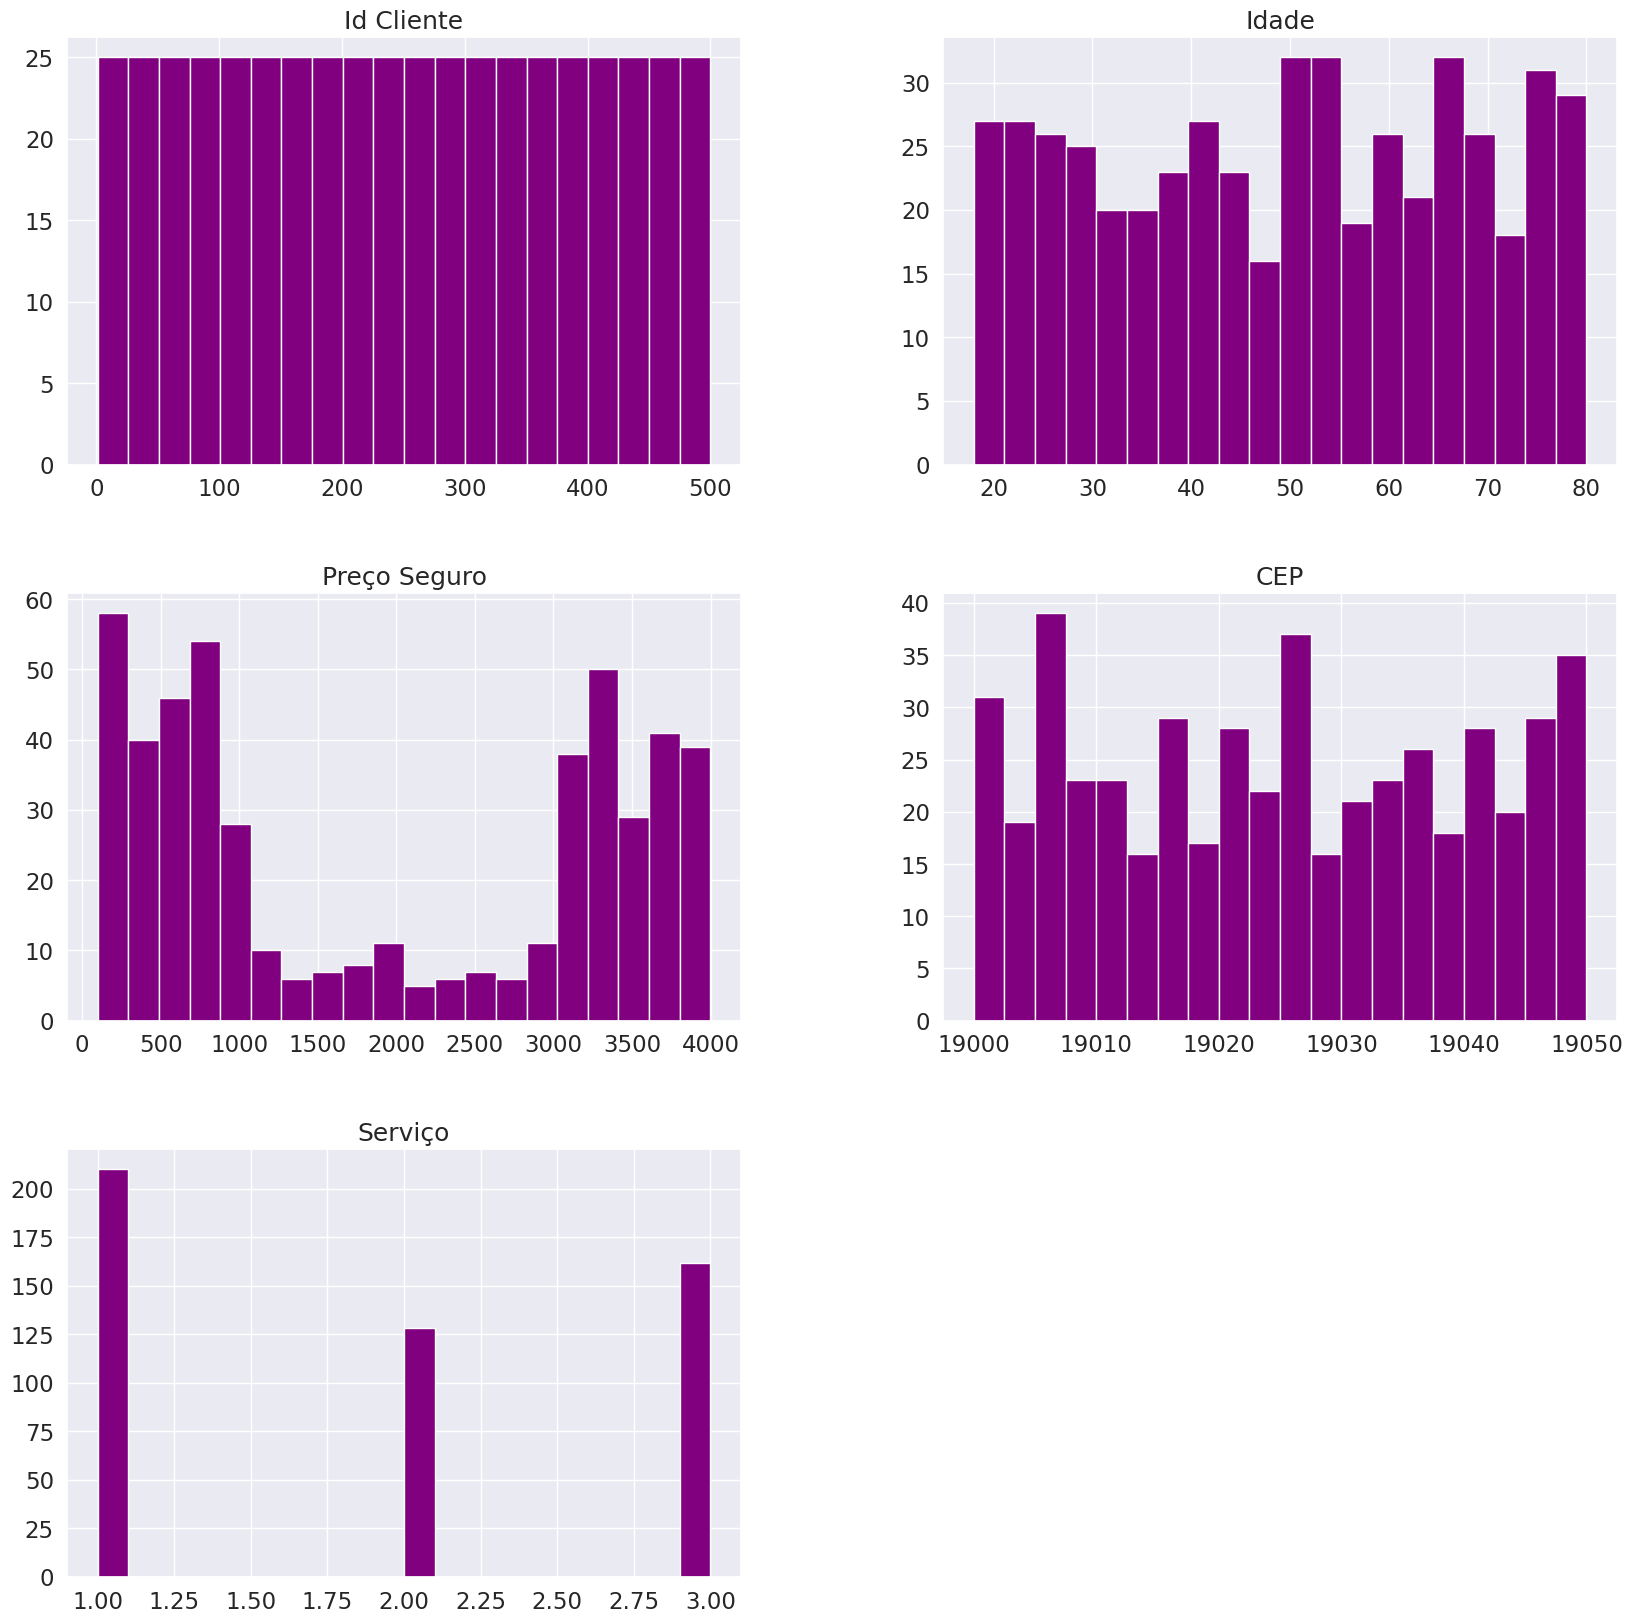

In [ ]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20,20)})
eixo = Base_Dados.hist(bins=20, color='purple')

<Axes: xlabel='Serviço', ylabel='Idade'>

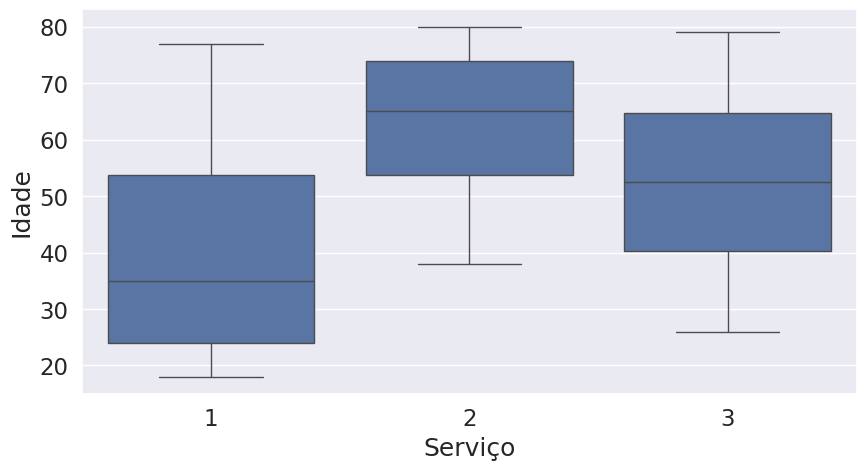

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Base_Dados, x='Serviço', y='Idade')

<Axes: xlabel='Serviço', ylabel='Preço Seguro'>

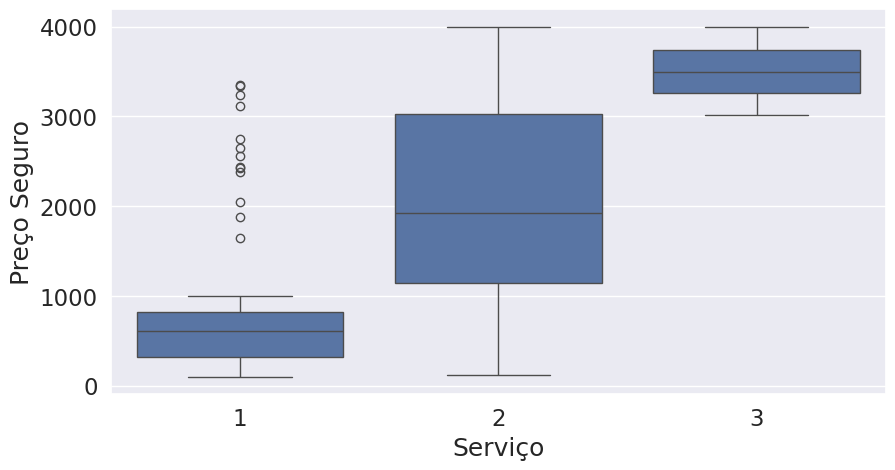

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Base_Dados, x='Serviço', y='Preço Seguro')

<Axes: xlabel='Serviço', ylabel='CEP'>

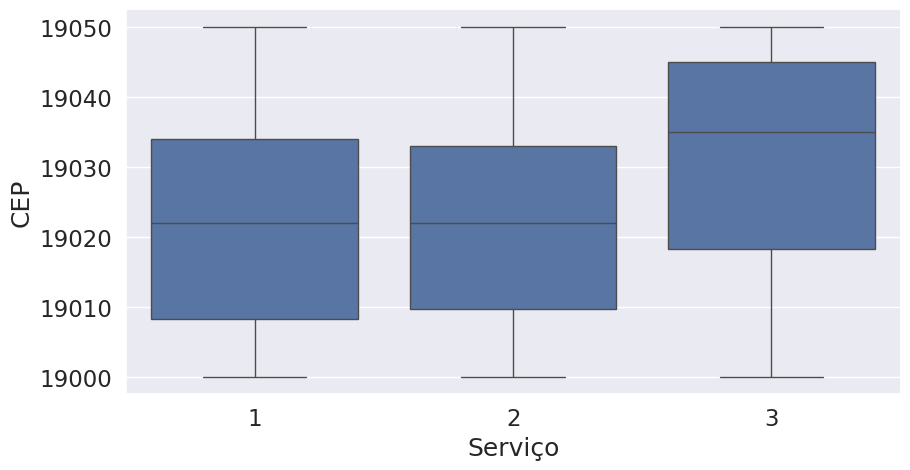

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Base_Dados, x='Serviço', y='CEP')

In [ ]:
Caracteristicas = Base_Dados.iloc[:, 1:4].values
Previsor = Base_Dados.iloc[:, 4:5].values

In [ ]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(Caracteristicas, Previsor, test_size=0.30, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

floresta = RandomForestClassifier(n_estimators=500)
floresta.fit(x_treinamento, y_treinamento)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=500)

[[61  2  1]
 [ 6 22  8]
 [ 0  1 49]]


<Axes: >

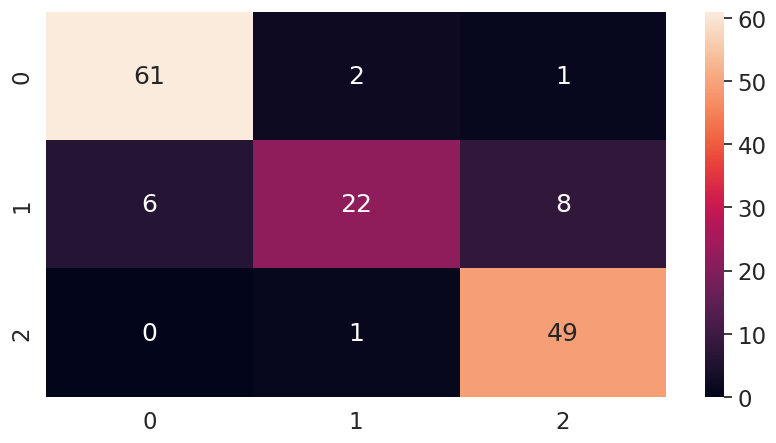

In [ ]:
Previsoes = floresta.predict(x_teste)

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_teste, Previsoes)
print(matriz)

plt.figure(figsize=(10,5))
sns.heatmap(matriz, annot=True)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_teste, Previsoes)
print(report)

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        64
           2       0.88      0.61      0.72        36
           3       0.84      0.98      0.91        50

    accuracy                           0.88       150
   macro avg       0.88      0.85      0.85       150
weighted avg       0.88      0.88      0.87       150



In [ ]:
Novas_vendas = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')
Novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [ ]:
Prever = Novas_vendas.iloc[:, 1:4].values

Novas_vendas['Previsao do Modelo'] = floresta.predict(Prever)
Novas_vendas

,Id Cliente,Idade,Preço Seguro,CEP,Previsao do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1


In [ ]:
Novas_vendas['Previsao do Modelo'].value_counts()

,count
Previsao do Modelo,
1,15
2,5
3,1
